In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import numpy as np

In [2]:
def plot_function(f, min, max, points=200,
                 title=None):
    """
    Plot a real function of the form y = f(x)
    """
    x = np.linspace(min, max,points)
    vf = np.vectorize(f,otypes=[float])
    y = vf(x)
    plt.xlim(min,max)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    return plt.plot(x,y)

## Chapter 6

Text(0.5, 0.98, 'Figure 6.5')

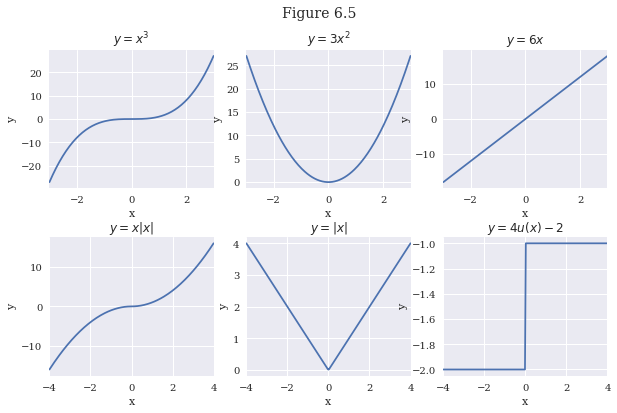

In [3]:
plt.figure(figsize=(10,6))
plt.subplot(231)
plot_function(lambda x: x ** 3, -3,3,title='$y = x^3$')
plt.subplot(232)
plot_function(lambda x: 3*x ** 2, -3,3,title='$y = 3x^2$')
plt.subplot(233)
plot_function(lambda x: 6*x, -3,3,title='$y = 6x$')
plt.subplot(234)
plot_function(lambda x: x*np.abs(x), -4,4,title='$y = x|x|$')
plt.subplot(235)
plot_function(lambda x: np.abs(x), -4,4,title='$y = |x|$')
plt.subplot(236)
plot_function(lambda x: np.heaviside(x,4)-2, -4,4,title='$y = 4u(x)-2$')
plt.subplots_adjust(hspace=0.35) #adjust horizontal space between plots
plt.suptitle("Figure 6.5", fontsize=14)

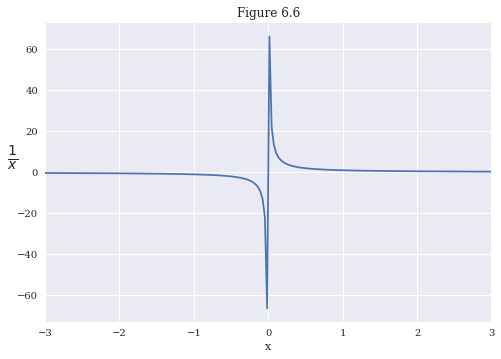

In [4]:
plot_function(lambda x : 1/x, -3,3, title= 'Figure 6.6')
h = plt.ylabel(r'$\frac{1}{x}$', fontsize=20)
h.set_rotation(0)

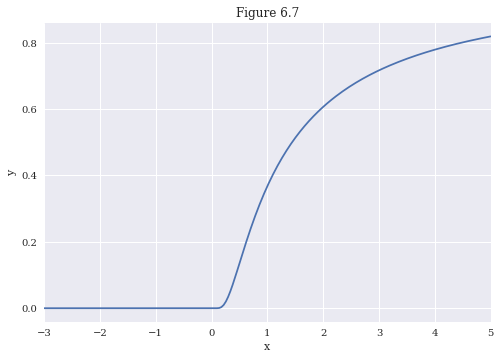

In [5]:
plot_function(lambda x : 0 if x <= 0 else np.exp(-1/x), -3,5, title= 'Figure 6.7')

In [6]:
def func(x):
    return 0.5*np.exp(x)+1
a,b = 0.5,1.5
x = np.linspace(0,2)
y = func(x)
Ix = np.linspace(a,b)
Iy = func(Ix)
verts = [(a,0)]+list(zip(Ix,Iy))+ [(b,0)]

## Section 6.6 Integration

[Text(0, 1.824360635350064, 'f(a)'), Text(0, 3.2408445351690323, 'f(b)')]

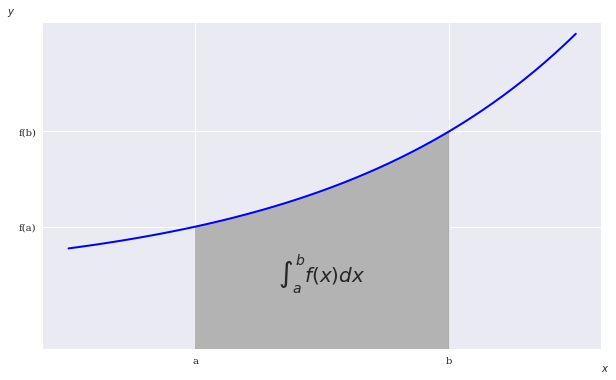

In [7]:
from matplotlib.patches import Polygon

fig,ax = plt.subplots(figsize=(10,6))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5*(a+b), 1, r'$\int_a^b f(x)dx$',
        horizontalalignment='center', fontsize=20)
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$y$')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks((func(a),func(b)))
ax.set_yticklabels(('f(a)','f(b)'))

In [8]:
import plotly
plotly.__version__

'5.4.0'

In [9]:

import plotly.offline as plyo
import plotly.graph_objects as go
plyo.init_notebook_mode(connected=True)

x = np.linspace(-3.0,3.0,100)
y = np.linspace(-3.0,3.0,100)
xx, yy = np.meshgrid(x, y, sparse=True)
z = xx*yy/(xx*xx+yy*yy)

layout = go.Layout(title=r'$N=1$', autosize=False, width=700, height=700)
fig = go.Figure(data=[go.Surface(z=z,x=x,y=y)], layout=layout)
fig.show()

In [10]:
x = np.linspace(-0.5,0.5,50)
y = np.linspace(-0.5,0.5,50)
xx, yy = np.meshgrid(x, y, sparse=True)
z = xx*yy/(xx*xx+yy*yy)**2

layout = go.Layout(title=r'$N=2$', autosize=False, width=700, height=700)
fig = go.Figure(data=[go.Surface(z=z,x=x,y=y)], layout=layout)

fig.show()

In [11]:
x = np.linspace(-1.5,1.5,50)
y = np.linspace(-1.5,1.5,50)
xx, yy = np.meshgrid(x, y, sparse=True)
z = xx*yy/np.sqrt(xx*xx+yy*yy)

fig = go.Figure(data=[go.Surface(z=z,x=x,y=y)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

map = Basemap(projection='ortho',lat_0=45,lon_0=-150) 
map.drawmapboundary(fill_color='aquamarine')
map.drawmeridians(np.arange(0,360,30)) # grid every 30 deg
map.drawparallels(np.arange(-90,90,30))

nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.6*(np.sin(2.*lats)**6*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)

x, y = map(lons*180./np.pi, lats*180./np.pi) # projection from lat, lon to sphere
cs = map.contour(x,y,wave+mean,15,linewidths=1.5) # contour data. You can use pcolor() for your project
plt.title('test1')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'